<a href="https://colab.research.google.com/github/vivivicdjdk/machine/blob/main/iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

iris = pd.read_csv('https://raw.githubusercontent.com/jmnote/zdata/master/R/iris.csv')

클래스 추출

데이터에 어떤 클래스가 있는지 확인

In [ ]:
print(pd.unique(iris['Species']))

['setosa' 'versicolor' 'virginica']


입력 데이터와 정답 데이터 생성

5번째 까지의 데이터를 각각 출력

In [ ]:
iris_input = iris[['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width']].to_numpy()
iris_target = iris['Species'].to_numpy()

In [ ]:
print(iris_input[:5])
print(iris_target[:5])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
['setosa' 'setosa' 'setosa' 'setosa' 'setosa']


훈련 세트와 테스트 세트로 나누기



In [ ]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target= train_test_split(
    iris_input, iris_target, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

k-최근접 이웃 분류기의 확률 예측

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(train_scaled, train_target)
print(kn.score(train_scaled, train_target))
print(kn.score(test_scaled, test_target))

0.9464285714285714
1.0


In [ ]:
print(kn.classes_)

['setosa' 'versicolor' 'virginica']


In [ ]:
print(kn.predict(test_scaled[:5]))

['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor']


In [ ]:
import numpy as np
proba = kn.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=4))

[[0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]]


In [ ]:
distances, indexes = kn.kneighbors(test_scaled[3:4])
print(train_target[indexes])

[['versicolor' 'versicolor' 'versicolor']]


로지스틱 회귀 다중 분류

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=20, max_iter=1000)
lr.fit(train_scaled, train_target)

print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.9821428571428571
1.0


In [ ]:
print(lr.predict(test_scaled[:5]))

['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor']


In [ ]:
proba = lr.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=3))

[[0.    0.99  0.01 ]
 [0.995 0.005 0.   ]
 [0.    0.    1.   ]
 [0.    0.955 0.044]
 [0.    0.959 0.041]]


In [ ]:
print(lr.classes_)

['setosa' 'versicolor' 'virginica']


In [ ]:
print(lr.coef_.shape, lr.intercept_.shape)

(3, 4) (3,)


In [ ]:
decision = lr.decision_function(test_scaled[:5])
print(np.round(decision, decimals=2))

[[ -3.83   4.21  -0.38]
 [ 13.07   7.84 -20.92]
 [-18.64   2.58  16.06]
 [ -4.19   3.63   0.56]
 [ -6.52   4.84   1.68]]


In [ ]:
from scipy.special import softmax

proba = softmax(decision, axis=1)
print(np.round(proba, decimals=3))

[[0.    0.99  0.01 ]
 [0.995 0.005 0.   ]
 [0.    0.    1.   ]
 [0.    0.955 0.044]
 [0.    0.959 0.041]]


확률적 경사 하강법

In [ ]:
from sklearn.linear_model import SGDClassifier

sc = SGDClassifier(loss='log_loss', max_iter=10, random_state=42)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.9464285714285714
1.0


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [ ]:
sc.partial_fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.9017857142857143
0.9210526315789473


확률적 경사 하강법 최적화

In [ ]:
import numpy as np
sc = SGDClassifier(loss='log', random_state=42)
train_score = []
test_score = []
classes = np.unique(train_target)

In [ ]:
for _ in range(0, 300) :
  sc.partial_fit(train_scaled, train_target, classes=classes)
  train_score.append(sc.score(train_scaled, train_target))
  test_score.append(sc.score(test_scaled, test_target))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


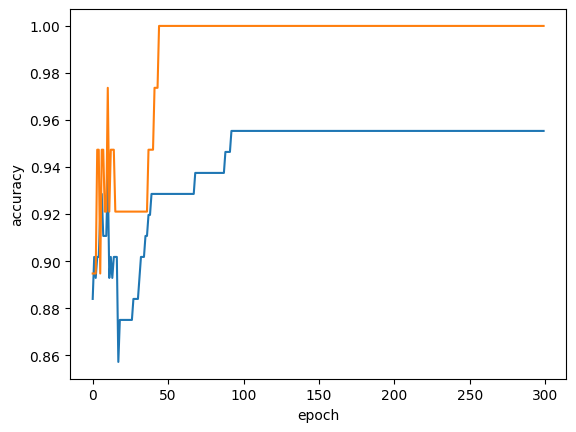

In [ ]:
import matplotlib.pyplot as plt

plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

최적화

로지스틱회귀 다중 분류 훈련 및 최적화